In [1]:
import os
import pandas as pd

In [ ]:
# In this cell, I merged all the 8 files into 1 single file and named as all_data.csv

files = [file for file in os.listdir("cleaned")]   # generate a list of files present in Cars_Data folder

car_data = pd.DataFrame()     # create a empty data frame of name all_cars_data

for file in files:
    df = pd.read_csv("cleaned/" + file)     # loop through files vairable and get a file
    car_data = pd.concat([car_data,df])    # merge those files data into one data frame inshort merging dataframes
    
car_data.to_csv("all_data.csv",index=False)

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df

,name,price,city,year,mileage,feul,engine,driving,model_name
0,Kia Sportage,55.15,Sialkot,2020,4300,Petrol,2000,Automatic,KIA AWD
1,Kia Sportage,52.95,Islamabad,2020,11384,Petrol,2000,Automatic,KIA FWD
2,Kia Sportage,0.00,Lahore,2021,2400,Petrol,2000,Automatic,KIA AWD
3,Kia Sportage,57.40,Islamabad,2021,3000,Petrol,2000,Automatic,KIA AWD
4,Kia Sportage,57.50,Islamabad,2021,25,Petrol,2000,Automatic,KIA AWD
...,...,...,...,...,...,...,...,...,...
35946,toyota corola,8.60,Peshawar,2001,100000,Petrol,1300,Manual,Toyota SE
35947,toyota corola,15.20,Kasur,2010,185000,Petrol,1300,Manual,Toyota XLi
35948,toyota corola,27.30,Sargodha,2017,57000,Petrol,1300,Manual,Toyota GLi
35949,toyota corola,40.50,Rahim Yar Khan,2019,33000,Petrol,1800,Automatic,Toyota Altis


In [4]:
d = df.copy()

In [5]:
d

,name,price,city,year,mileage,feul,engine,driving,model_name
0,Kia Sportage,55.15,Sialkot,2020,4300,Petrol,2000,Automatic,KIA AWD
1,Kia Sportage,52.95,Islamabad,2020,11384,Petrol,2000,Automatic,KIA FWD
2,Kia Sportage,0.00,Lahore,2021,2400,Petrol,2000,Automatic,KIA AWD
3,Kia Sportage,57.40,Islamabad,2021,3000,Petrol,2000,Automatic,KIA AWD
4,Kia Sportage,57.50,Islamabad,2021,25,Petrol,2000,Automatic,KIA AWD
...,...,...,...,...,...,...,...,...,...
35946,toyota corola,8.60,Peshawar,2001,100000,Petrol,1300,Manual,Toyota SE
35947,toyota corola,15.20,Kasur,2010,185000,Petrol,1300,Manual,Toyota XLi
35948,toyota corola,27.30,Sargodha,2017,57000,Petrol,1300,Manual,Toyota GLi
35949,toyota corola,40.50,Rahim Yar Khan,2019,33000,Petrol,1800,Automatic,Toyota Altis


In [9]:
len(d.city.unique())

367

In [10]:
city_stats = d.groupby('city')['city'].agg('count').sort_values(ascending=False)

In [11]:
city_stats

city
Lahore                                       5817
Karachi                                      5259
Islamabad                                    4725
Rawalpindi                                   2889
Peshawar                                     1957
                                             ... 
Sahiwal\n                       Leased          1
Jauharabad\n                       Leased       1
Sadiqabad\n                       Leased        1
Rohri                                           1
Kunri                                           1
Name: city, Length: 367, dtype: int64

### Replacing cities with other, where cities have less than 121 cars of data.

In [20]:
city_stats[city_stats<=120]

city
Dera ismail khan                             114
Mian Wali                                    114
Mirpur A.K.                                  113
Kohat                                        113
Taxila                                       106
                                            ... 
Sahiwal\n                       Leased         1
Jauharabad\n                       Leased      1
Sadiqabad\n                       Leased       1
Rohri                                          1
Kunri                                          1
Name: city, Length: 334, dtype: int64

In [30]:
city_less_than = city_stats[city_stats<=200]

In [19]:
367-217

150

In [31]:
d.city = d.city.apply(lambda x: 'other' if x in city_less_than else x)

In [32]:
len(d.city.unique())

24

In [193]:
df.isna().sum()

name          0
price         0
city          0
year          0
mileage       0
feul          0
engine        0
driving       0
model_name    0
dtype: int64

In [194]:
df.dtypes

name           object
price         float64
city           object
year            int64
mileage         int64
feul           object
engine          int64
driving        object
model_name     object
dtype: object

In [33]:
#df4 = df3.copy()
df0 = d.copy()

In [196]:
df0 = df0[df0.engine>=30]

In [174]:
len(dfff.city.unique())

367

In [34]:
df0.city.unique()

array(['Sialkot', 'Islamabad', 'Lahore', 'other', 'Karachi',
       'Lahore\n                       Leased', 'Mandi bahauddin',
       'Bahawalpur', 'Abottabad', 'Multan', 'Rawalpindi', 'Hyderabad',
       'Faisalabad', 'Gujranwala', 'Sargodha', 'Gujrat', 'Peshawar',
       'Rahim Yar Khan', 'Attock', 'Mardan', 'Quetta', 'Mansahra',
       'Wah cantt', 'Chakwal'], dtype=object)

### Treating garbage data

In [35]:
df0['city']=df0.city.str.replace("\n                       Leased"," ")

In [36]:
df0.size

323559

In [37]:
df0.describe()

,price,year,mileage,engine
count,35951.000000,35951.000000,35951.000000,35951.000000
mean,16.314558,2011.171567,87335.854941,1233.966566
std,12.008135,7.415583,88262.835609,400.242695
min,0.000000,1964.000000,1.000000,4.000000
25%,7.250000,2007.000000,38000.000000,800.000000
50%,12.200000,2012.000000,72000.000000,1300.000000
75%,22.750000,2017.000000,108532.000000,1600.000000
max,80.000000,2021.000000,999999.000000,5539.000000


### Detecting outliers

In [152]:
df0[df5.price>59.000000]

,name,price,city,year,mileage,feul,engine,driving,model_name
302,Kia Sportage,59.50,Lahore,2021,28,Petrol,2000,Automatic,KIA AWD
469,Kia Sportage,59.25,Islamabad,2021,170,Petrol,2000,Automatic,KIA AWD
496,Kia Sportage,60.00,Faisalabad,2021,34,Petrol,2000,Automatic,KIA AWD
509,Kia Sportage,60.00,Mardan,2021,1822,Petrol,2400,Automatic,KIA
567,Kia Sportage,60.00,Islamabad,2020,5000,Petrol,2000,Automatic,KIA AWD
583,Kia Sportage,59.50,Rawalpindi,2020,4000,Petrol,2000,Automatic,KIA AWD
754,Kia Sportage,60.00,Islamabad,2021,6000,Petrol,2000,Automatic,KIA AWD
2232,suzuki alto,62.50,Attock,2006,75020,Petrol,1000,Manual,Suzuki VXR
13270,suzuki cultus,80.00,Faisalabad,2007,78650,Petrol,1000,Manual,Suzuki VXL
26238,toyota corola,68.00,Rawalpindi,2020,21000,Hybrid,1800,Automatic,Toyota


In [158]:
df5[df5.price < 1.8]

,name,price,city,year,mileage,feul,engine,driving,model_name
2,Kia Sportage,0.0,Lahore,2021,2400,Petrol,2000,Automatic,KIA AWD
35,Kia Sportage,0.0,Islamabad,2021,20,Petrol,2000,Automatic,KIA AWD
36,Kia Sportage,0.0,Islamabad,2021,20,Petrol,2000,Automatic,KIA FWD
66,Kia Sportage,0.0,Islamabad,2021,55,Petrol,2000,Automatic,KIA AWD
67,Kia Sportage,0.0,Karachi,2021,20,Petrol,2000,Automatic,KIA AWD
...,...,...,...,...,...,...,...,...,...
34201,toyota corola,0.0,Karachi,2017,47000,Petrol,1600,Automatic,Toyota Altis
34357,toyota corola,0.0,Karachi,2016,21300,Petrol,1300,Automatic,Toyota GLi
34518,toyota corola,0.0,Karachi,2019,55000,Petrol,1600,Automatic,Toyota Altis
35247,toyota corola,1.7,Karachi,1974,74000,CNG,1200,Manual,Toyota 2.0D


In [150]:
df5['price'].quantile(0.98)

50.5

In [91]:
df3

40.0

In [117]:
import matplotlib.pyplot as plt

### Prices of cars are leftly skewed

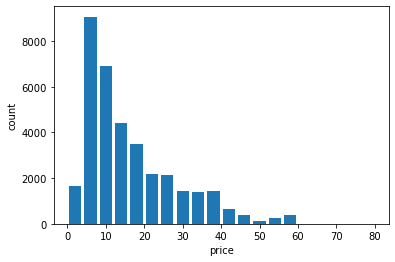

In [118]:
plt.hist(df.price, bins =20, rwidth=0.8)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

In [39]:
min_threshold = 1.7
max_threshold = 60

In [40]:
df0 = df0[(df0.price<max_threshold) & (df0.price>min_threshold)]
df0.shape

(35678, 9)

In [161]:
df1.describe()

,price,year,mileage,engine
count,35675.000000,35675.000000,35675.000000,35675.000000
mean,16.419962,2011.147891,87616.533455,1232.482719
std,11.945618,7.389320,88213.683935,399.560752
min,1.750000,1964.000000,1.000000,100.000000
25%,7.350000,2007.000000,38606.500000,800.000000
50%,12.300000,2012.000000,72000.000000,1300.000000
75%,22.800000,2017.000000,109000.000000,1600.000000
max,59.500000,2021.000000,999999.000000,5539.000000


In [41]:
df0.to_csv('useable_data.csv',index=False)